# 初学者向けPandas100本ノックver1.0.3

In [4]:
# ライブラリーの読み込み
import pandas as pd
import glob

# DataFrameの準備
df = pd.read_csv('./data/titanic3.csv')
df2 = pd.read_csv('./data/data1.csv')
df3 = pd.read_csv('./data/data1_2.csv')
df4 = pd.read_csv('./data/data1_3.csv')
df5 = pd.read_csv('./data/data2.csv',encoding='cp932')

In [5]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


# データ加工 (33 - 58)

In [6]:
# 【41】
# dfからbodyの列を削除し、最初の5行を表示

df = df.drop('body',axis=1)
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON"


・行・列の削除をするにはdropを使用  
・列を削除する場合は、axis=1を指定  
（行を削除する場合は、axis=0）  

In [7]:
# 【42】
# dfからインデックス名「3」の行を削除し、最初の5行を表示

df = df.drop(3,axis=0)
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.00,0,0,19952,26.5500,E12,S,3,"New York, NY"


In [8]:
df2.head(3)

,name,class,English,Mathmatics,History
0,A,1,80,55,65
1,B,1,55,100,83
2,C,2,65,70,95


In [9]:
# 【43】
# df2の列名を'name', 'class', 'Biology', 'Physics', 'Chemistry'に変更
# df2の最初の5行を表示

df2.columns = ['name', 'class', 'Biology', 'Physics', 'Chemistry']
df2.head()

,name,class,Biology,Physics,Chemistry
0,A,1,80,55,65
1,B,1,55,100,83
2,C,2,65,70,95
3,D,1,40,63,70
4,E,2,76,82,79


・データフレーム.columns = リストで  
　列名を一括変更  
・renameを用いて以下のように変更することも可能

In [10]:
# 【44】
# df2の列名を'English'をBiology'に変更
# df2の最初の5行を表示

df2 = df2.rename(columns={'English' : 'Biology'})
df2.head()

,name,class,Biology,Physics,Chemistry
0,A,1,80,55,65
1,B,1,55,100,83
2,C,2,65,70,95
3,D,1,40,63,70
4,E,2,76,82,79


In [11]:
# 【45】
# df2のインデックス名「1」を「10」に変更
# df2の最初の5行を表示

df2 = df2.rename(index={1 : 10})
df2.head()

,name,class,Biology,Physics,Chemistry
0,A,1,80,55,65
10,B,1,55,100,83
2,C,2,65,70,95
3,D,1,40,63,70
4,E,2,76,82,79


In [12]:
# 【46】
# dfのすべての列の欠損値数を確認

df.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          822
home.dest     564
dtype: int64

・isnull().sum()で欠損値数を確認  
・欠損値じゃないレコードの数を確認したい場合は、  
　notnull().sum()

In [13]:
# 【47】
# dfのage列の欠損値に30を代入
# その後、ageの欠損値数を確認

df['age'] = df['age'].fillna(30)
df.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age             0
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          822
home.dest     564
dtype: int64

欠損値の補完にはfillnaを使用

In [15]:
# 【48】
# dfでひとつでも欠損値がある行を削除
# その後、dfの欠損値数を確認

df = df.dropna()
df.isnull().sum()

pclass       0
survived     0
name         0
sex          0
age          0
sibsp        0
parch        0
ticket       0
fare         0
cabin        0
embarked     0
boat         0
home.dest    0
dtype: int64

欠損値を含む行の削除には dropna を使用

In [16]:
# 【49】
# dfのsurvivedの列をndarray形式(配列)で表示

df['survived'].values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

・pandas.DataFrameやpandas.Seriesをndarray形式(配列)に  
　変換するにはvaluesを使用  
・機械学習ライブラリのscikit-learnではndarray形式で入力する  
　必要があるため、そのような際にDataFrameをndarrat形式に変換する  

In [17]:
# 【50】
# dfの行をシャッフルして表示

df.sample(frac=1)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest
198,1,1,"Marvin, Mrs. Daniel Warner (Mary Graham Carmic...",female,18.0,1,0,113773,53.1000,D30,S,10,"New York, NY"
273,1,1,"Spedden, Master. Robert Douglas",male,6.0,0,2,16966,134.5000,E34,C,3,"Tuxedo Park, NY"
94,1,1,"Dodge, Master. Washington",male,4.0,0,2,33638,81.8583,A34,S,5,"San Francisco, CA"
21,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S,5,"New York, NY"
253,1,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.0,1,3,PC 17608,262.3750,B57 B59 B63 B66,C,4,"Haverford, PA / Cooperstown, NY"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
340,2,1,"Becker, Miss. Marion Louise",female,4.0,2,1,230136,39.0000,F4,S,11,"Guntur, India / Benton Harbour, MI"
251,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C,4,"Haverford, PA / Cooperstown, NY"
68,1,1,"Chevre, Mr. Paul Romaine",male,45.0,0,0,PC 17594,29.7000,A9,C,7,"Paris, France"
208,1,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,C78,Q,14,"Fond du Lac, WI"


行をシャッフルして表示する場合は、sample(frac=1)を使用

## おまけ：欠損値の可視化

### ライブラリー Missingno
https://github.com/ResidentMario/missingno

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno # conda install -c conda-forge missingno

Duplicate key in file WindowsPath('C:/Users/iiats/Anaconda3/envs/Python37/lib/site-packages/matplotlib/mpl-data/matplotlibrc'), line 250 ('font.family:  IPAexGothic')


In [19]:
df = pd.read_csv('./data/titanic3.csv')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans.


<AxesSubplot:>

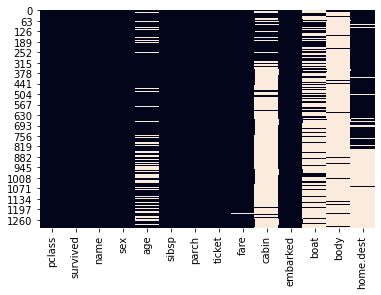

In [21]:
# Seabornを使う方法
sns.heatmap(df.isnull(), cbar=False)

<AxesSubplot:>

findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans.


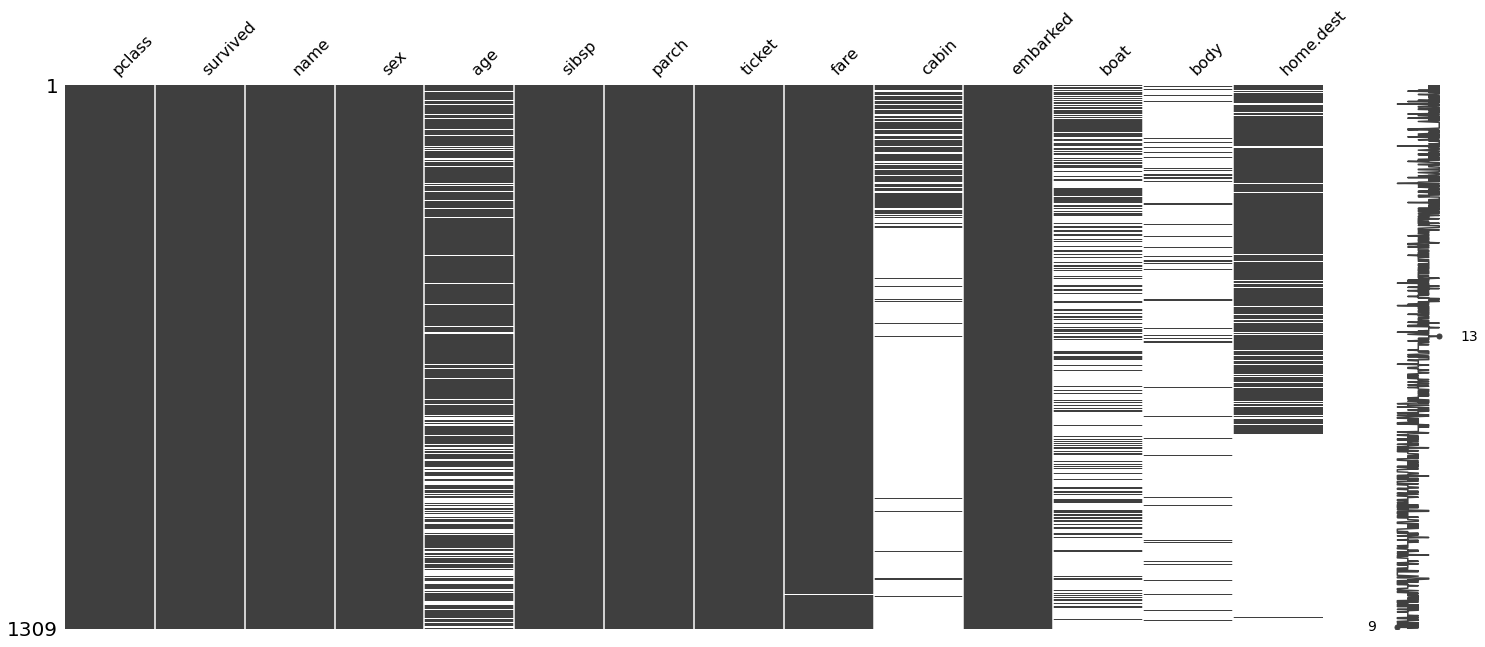

In [22]:
# Miggingno
msno.matrix(df)

<AxesSubplot:>

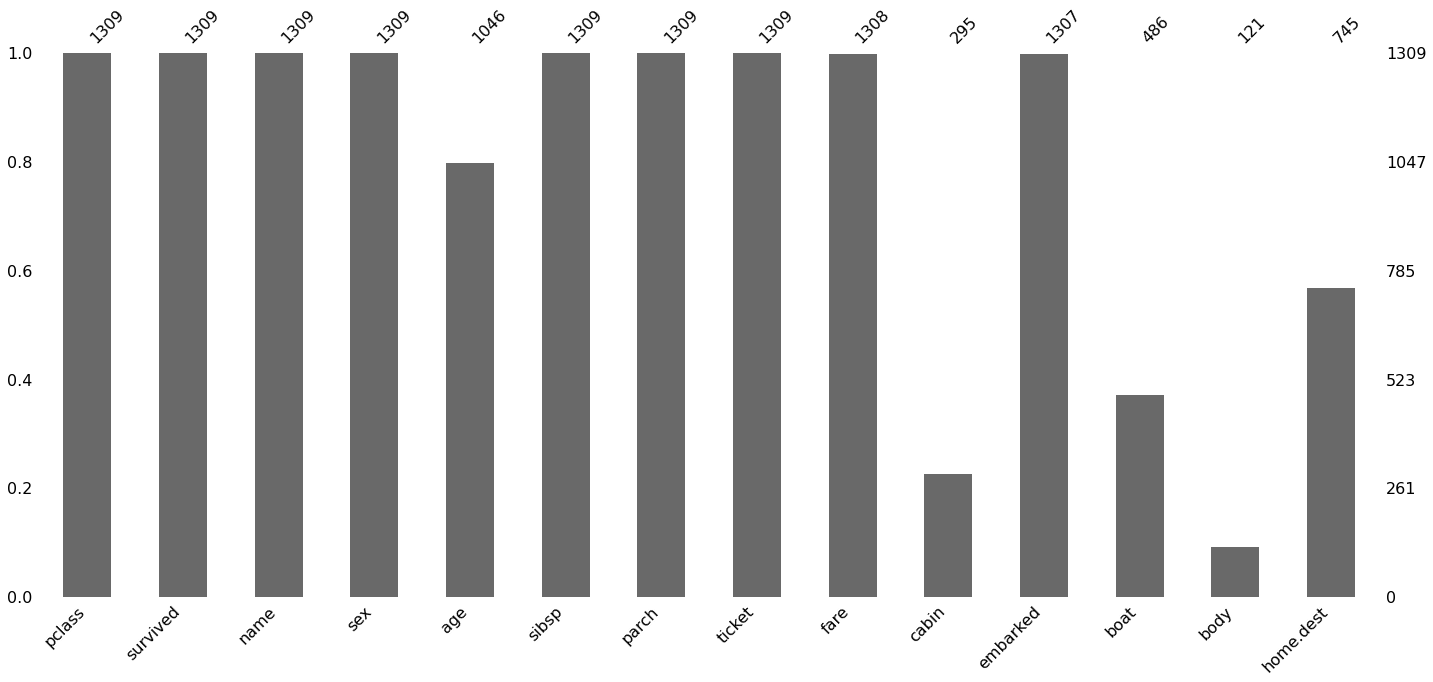

In [23]:
msno.bar(df)

<AxesSubplot:>

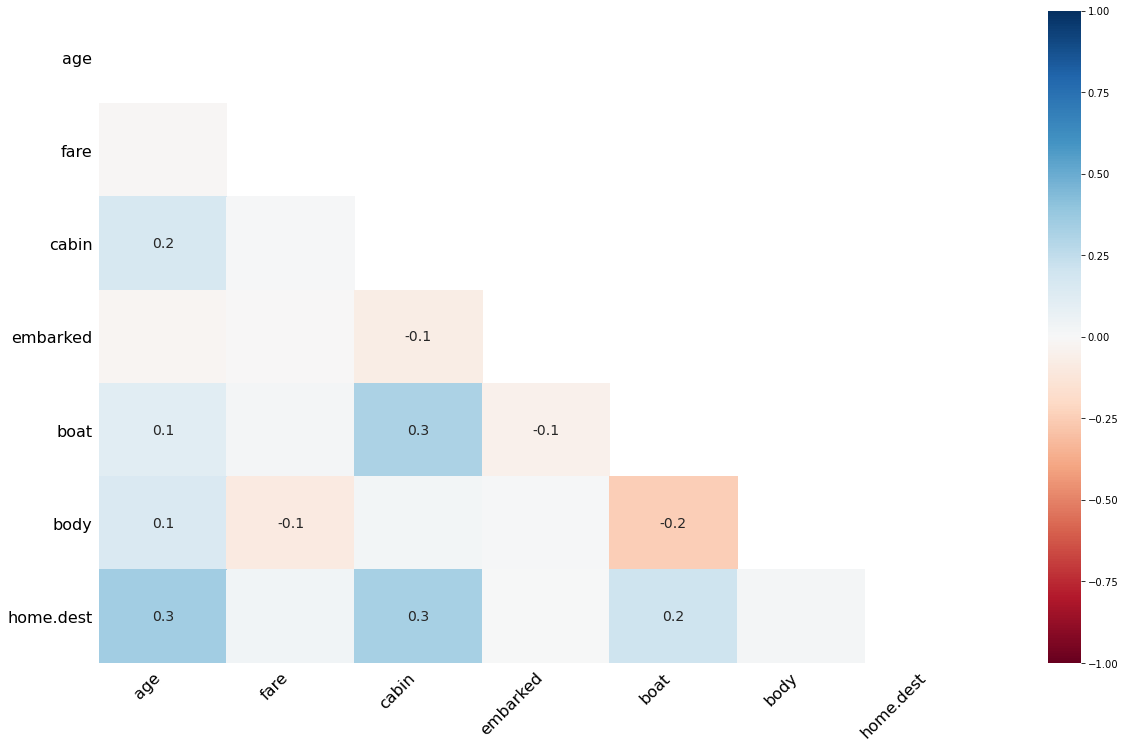

In [24]:
msno.heatmap(df)

<AxesSubplot:>

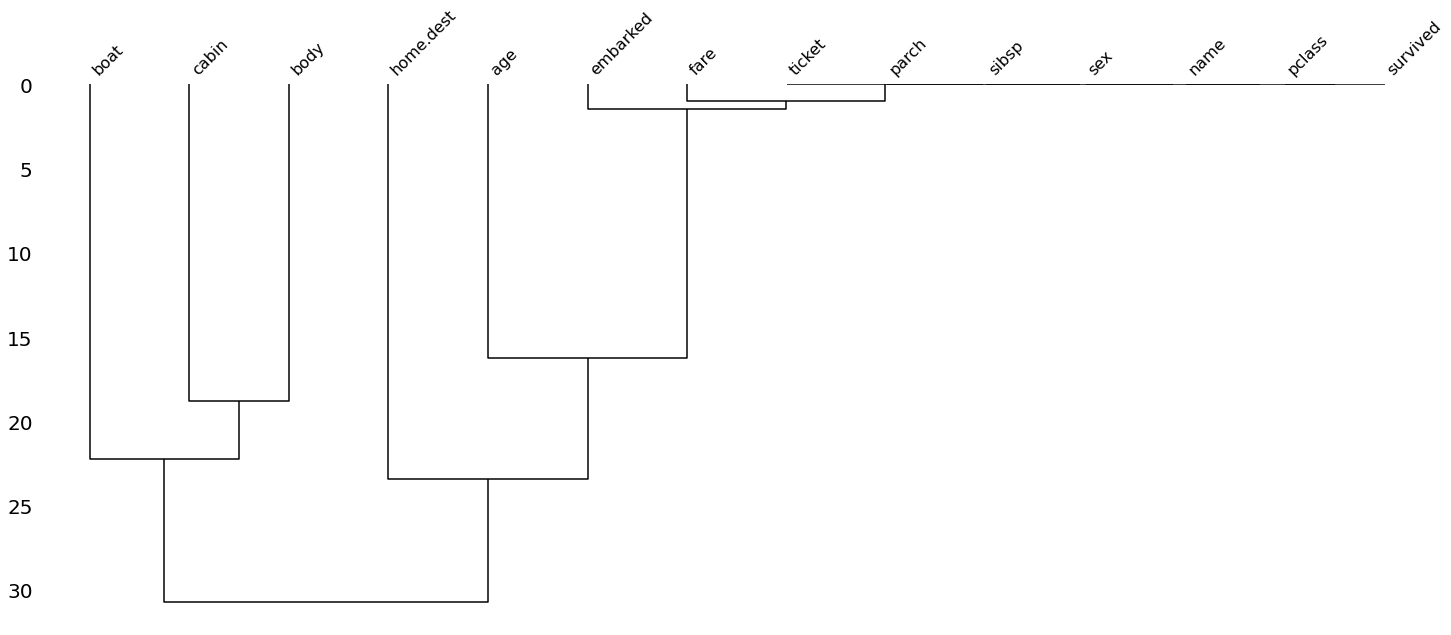

In [25]:
msno.dendrogram(df)